<a href="https://colab.research.google.com/github/ziri025/neww/blob/main/proj11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning algorithm to predict break in INCONEL ALLOY 718

In [ ]:

#import initial necessary library and classes
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os
from sklearn.model_selection import train_test_split
import xgboost as xgb
from google.colab import files 

import pandas as pd
import seaborn as sb


import matplotlib.pyplot as plt
from matplotlib import style

3 models will be used on the data. All follow  regression

In [ ]:
#import 3 models(regression based algorithms for use on data)

#stat model
import statsmodels.api as sm
from termcolor import colored as cl


#Extreme gradient model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

#Stochastic gradient model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#The data is fed into 
uploaded = files.upload()
dataset = pd.read_csv("newproj3.csv")
df= dataset 

Saving newproj3.csv to newproj3.csv


In [ ]:
dataset.head()

,strain,temperature,strainrate,stress
0,0.00,-180,4000,513
1,0.05,-180,4000,1086
2,0.10,-180,4000,1423
3,0.15,-180,4000,1599
4,0.20,-180,4000,1671


In [ ]:
dataset.tail()

,strain,temperature,strainrate,stress
259,0.30,750,7500,757
260,0.35,750,7500,707
261,0.40,750,7500,689
262,0.45,750,7500,728
263,0.50,750,7500,845


Graphical representation of data

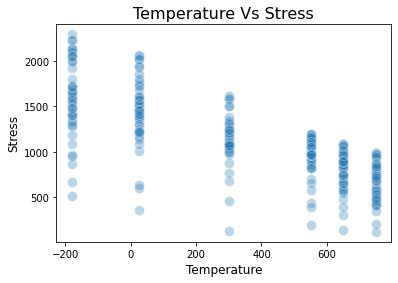

In [ ]:
plt.scatter(x = 'temperature', y = 'stress', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Temperature Vs Stress', fontsize = 16)
plt.ylabel('Stress', fontsize = 12)
plt.xlabel('Temperature', fontsize = 12)

plt.savefig('temperature.png')

In [ ]:
X1_var = df[['temperature', 'strainrate' , 'strain']] # independent variable
y_var = df['stress'] # dependent variable

Training

Using Stat regression model to predict stress in Wasaploy

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stress   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     194.0
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           4.97e-66
Time:                        10:14:06   Log-Likelihood:                -1832.0
No. Observations:                 264   AIC:                             3672.
Df Residuals:                     260   BIC:                             3686.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         731.2238     75.086      9.739      0.000     583.370     879.078
temperature    -1.0003      0.046    -21.727      0.000      -1.091      -0.910
strainrate      0.0993      0.012      8.290      0.000       0.076       0.123
strain        627.8333     97.956      6.409      0.000     434.945     820.721
==============================================================================
Omnibus:                       39.545   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.726
Skew:                          -0.897   Prob(JB):                     1.07e-13
Kurtosis:                       4.488   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

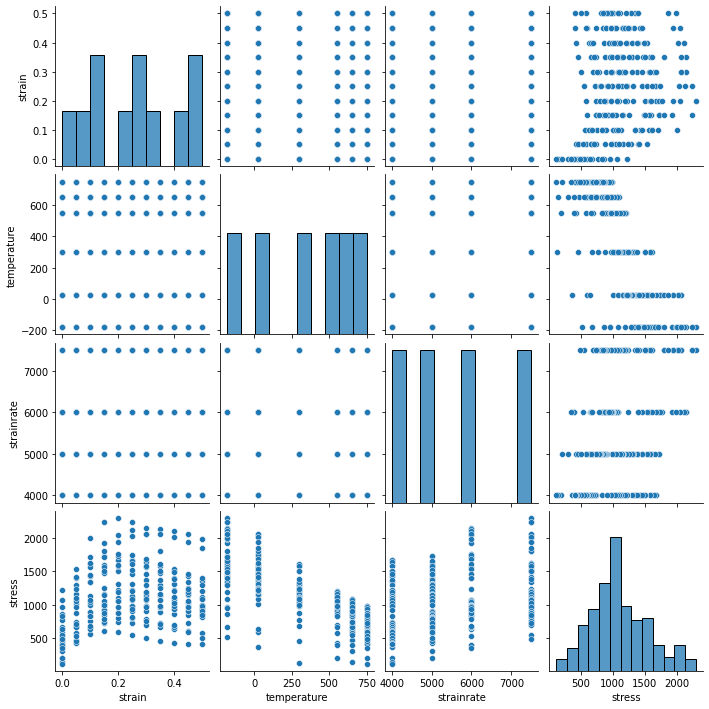

In [ ]:

sm_X1_var = sm.add_constant(X1_var)

mlr_model = sm.OLS(y_var, sm_X1_var) #ordinary least square
mlr_reg = mlr_model.fit()

# find some positive or negative linear relationships by implementing scatter plots. statistical visualization between variables

sb.pairplot(df)
plt.savefig('pairplor.png')


#summary
mlr_reg.summary()

Using eXtreme Gradient Boosting regression model to predict stress with data for Wasaploy

In [ ]:
X= df[['temperature', 'strainrate' , 'strain']] # independent variable
y = df['stress'] # dependent variable

In [ ]:

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train,y_train)
#make prediction
testpred =model.predict(X_test)
print(testpred)


# evaluate predictions
mae = mean_absolute_error(y_test, testpred)
print('MAE: %.3f' % mae)

(176, 3) (88, 3) (176,) (88,)
[ 315.42795 1961.7479   930.91113 1438.5844   647.85864  946.9622
  972.6198  1765.3298   501.91797  919.39386 1128.9309   568.60095
  936.9408  1319.1338  1412.9786  1917.9724    65.16352  602.7859
  378.31284  932.7637   857.95886 1519.9381  1251.3417   886.0554
 2058.4453  1682.2728   977.43176  677.86975  856.9173  1126.089
  911.47076 1137.6237  1215.4098   620.9955   656.0544   898.47943
 1563.7969   979.46454  892.90314 1261.5461   984.84564 1417.0881
 1028.7439   450.47375  807.1479  2012.2378  1201.047   2141.1443
  344.30832 1201.3187  1033.021   1440.5692   609.1277   854.52997
  952.12103 1858.7533  1089.1764  1064.2094  1710.7773   637.5917
 1102.5238  1238.7301   868.58673 1727.8907  1368.3542   680.07416
  865.36584 1675.7267  1329.3555  1377.7731  1174.3142   720.0079
  388.9452   768.372    918.67505  999.3186   623.06586 1142.1062
  956.1422  1183.3335   953.0382  1459.841   1116.0211   663.3695
 1142.8358  1670.0927   747.1311  1274.5597

Using SGDRegressor(Stochastic gradient model)

In [ ]:
X= df[['temperature', 'strainrate' , 'strain']] # independent variable
y = df['stress'] # dependent variable

In [ ]:
from sklearn import linear_model
SGDReg =linear_model.SGDRegressor(
   max_iter = 1000,penalty = "elasticnet",loss = 'huber',tol = 1e-3, average = True,   learning_rate='invscaling'
)
SGDReg.fit(X_train, y_train)
scores=SGDReg.score(X_train, y_train)

ypreds = SGDReg.predict(X_test)
print('r2', scores)





#cross validation
cv_score = cross_val_score(SGDReg, X, y, cv = 10)
print("CV mean score: ", cv_score.mean())




mse = mean_squared_error(y_test, ypreds)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
 



r2 0.39096873050184433
CV mean score:  -0.686278367072169
MSE:  94121.96571249342
RMSE:  306.7930340025559
